# Text Processor

## Goal

Create a raw text processer, that would return proper tokinised and tagged text in the form of list of centences, which in turn are a list of words/tag, plus some method for quick text pre-analysis.

## Purpose

Current document is a research log and test of Text Processor implementations.

In [1]:
EXM_FILE = 'data/news.txt'

### Importing necessary libraries

In [2]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options
sns.set_style("whitegrid")
sns.set_context("poster")

# NLTK imports
import nltk

In [3]:
# Read raw text
f = open(EXM_FILE, 'r')
text = nltk.Text(nltk.word_tokenize(f.read()))
f.close()

In [4]:
text.tokens

['From',
 'The',
 'Dialy',
 'Oklahoman',
 'Newspaper',
 ',',
 'September',
 '27',
 ',',
 '1993',
 ',',
 'Page',
 '1',
 ':',
 'COMPUTER',
 'PORN',
 'CASE',
 'TRIGGERS',
 'LEGAL',
 'QUESTIONS',
 'By',
 'David',
 'Zizzo',
 ',',
 'Staff',
 'Writer',
 'Is',
 'talking',
 'to',
 'Anthony',
 'Davis',
 'hazardous',
 'to',
 'your',
 'health',
 '?',
 'In',
 'a',
 'manner',
 'of',
 'speaking',
 ',',
 'that',
 "'s",
 'what',
 'numerous',
 'people',
 'with',
 'computers',
 'and',
 'modems',
 'apparently',
 'have',
 'been',
 'worrying',
 'about',
 'since',
 'late',
 'July',
 '.',
 'That',
 "'s",
 'when',
 'Oklahoma',
 'City',
 'police',
 'raided',
 'Davis',
 "'",
 'software',
 'publishing',
 'firm',
 'and',
 'confiscated',
 'his',
 'sophisticated',
 'commercial',
 'computer',
 'bulletin',
 'board',
 'system',
 '.',
 'Authorities',
 'allege',
 'Davis',
 'was',
 'selling',
 'pornographic',
 'computerized',
 'materials',
 'on',
 'CD-ROM',
 'and',
 'through',
 'files',
 'downloaded',
 'over',
 'phone',
 

### Most 50 words frequency distribution

In [5]:
def plot_freq_dist(fdist, limit=50, pltsize=(15, 10)):
    df = pd.DataFrame(fdist.most_common(limit), columns=['word', 'freq'])
    plt.figure(figsize=pltsize)
    bp = sns.barplot(x=df.word, y=df.freq)
    bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
    plt.show()

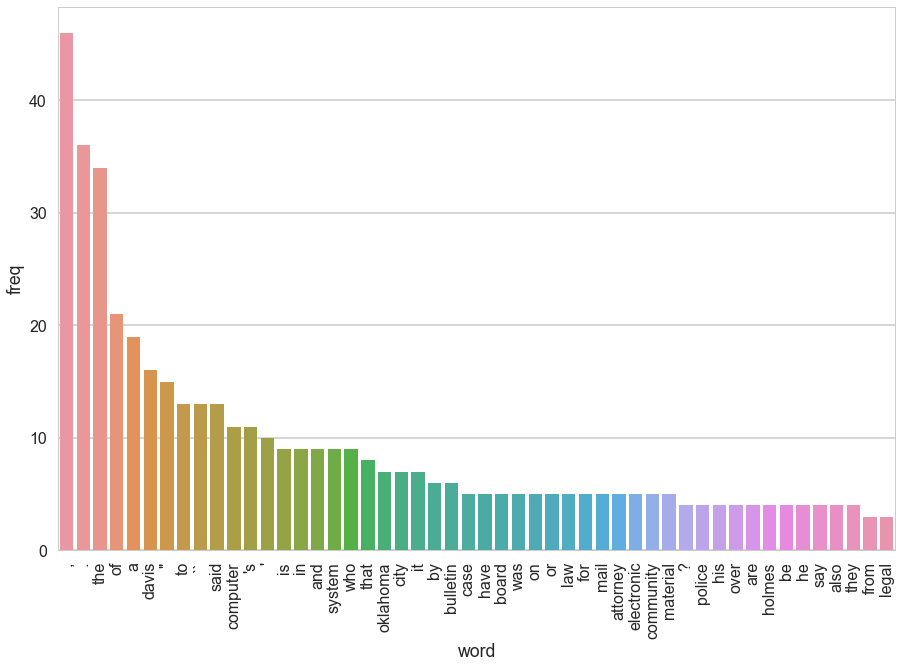

In [6]:
#fdist = nltk.FreqDist(w.lower() for w in text)
plot_freq_dist(nltk.FreqDist(w.lower() for w in text))

## Normilising text

### Apply `nltk.PorterStemmer()`

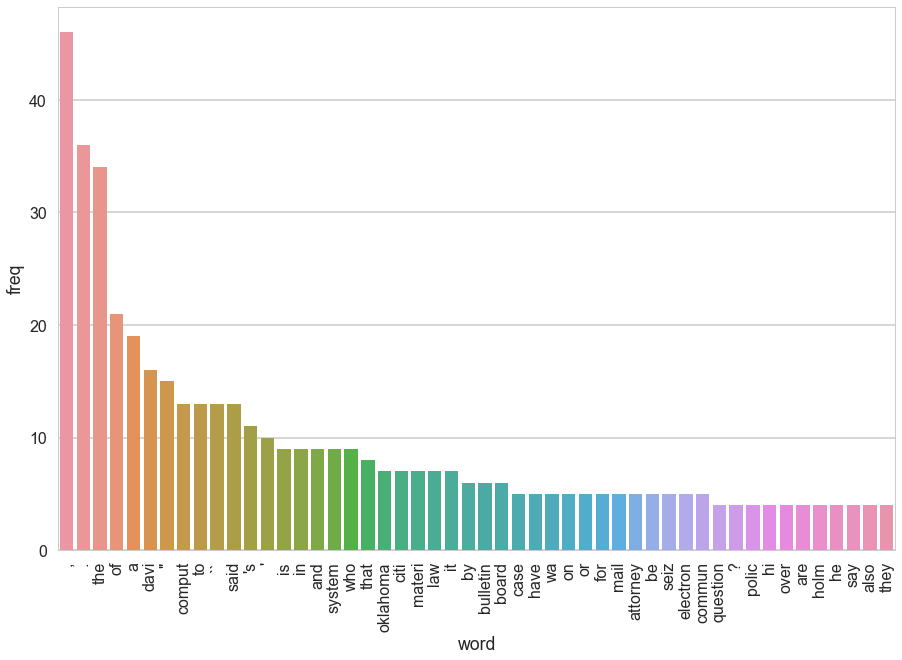

In [7]:
porter_stemmer = nltk.PorterStemmer()
plot_freq_dist(nltk.FreqDist(porter_stemmer.stem(w).lower() for w in text))

In [8]:
porter_stemmer.stem('going')

'go'

### Apply `nltk.LancasterStemmer`

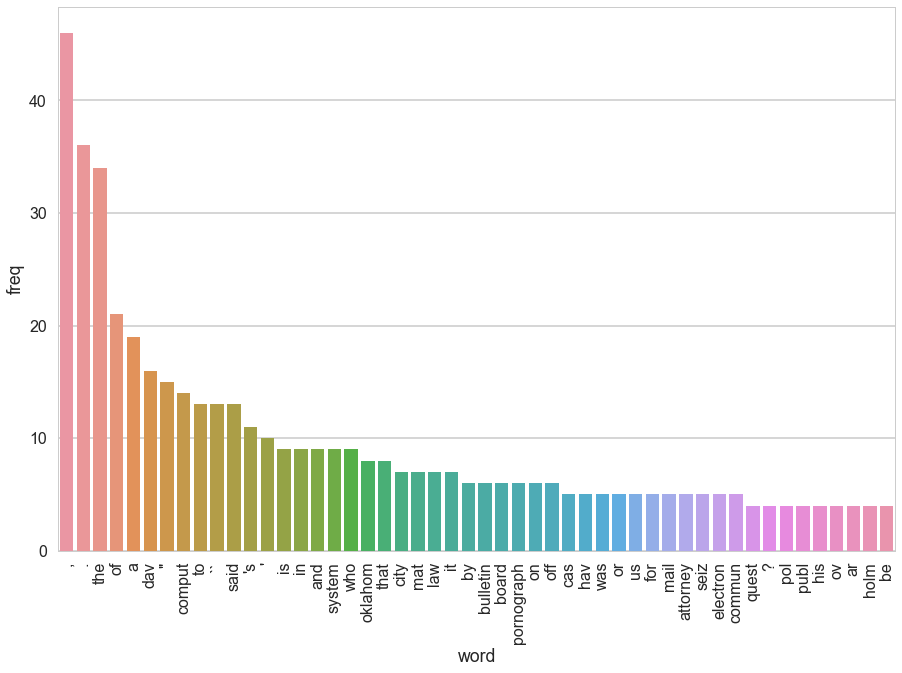

In [9]:
lancaster = nltk.LancasterStemmer()
plot_freq_dist(nltk.FreqDist(lancaster.stem(w).lower() for w in text))

In [10]:
lancaster.stem('goes')

'goe'

### Apply `nltk.WordNetLemmitizer()`

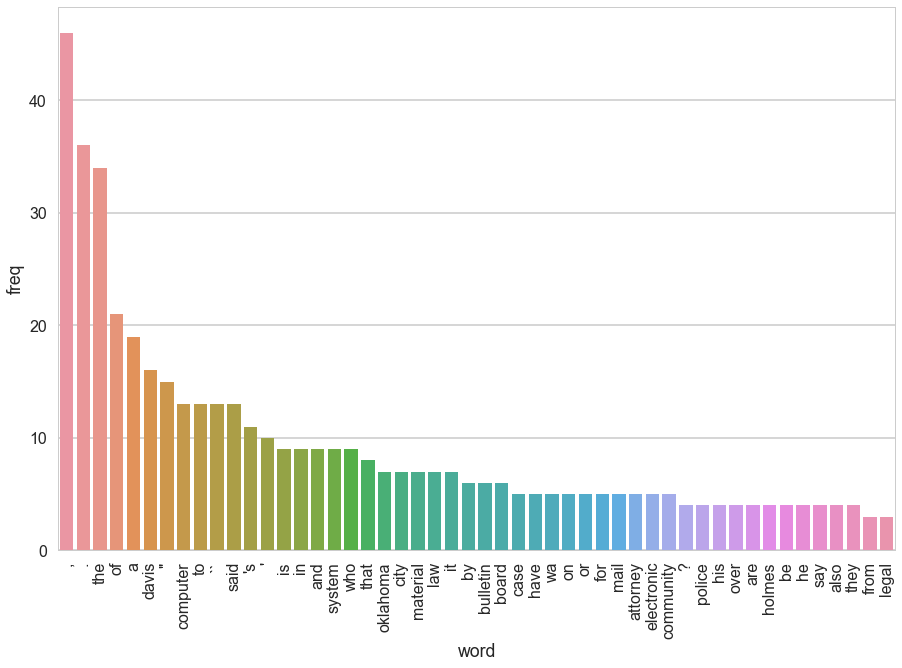

In [11]:
wnl = nltk.WordNetLemmatizer()
plot_freq_dist(nltk.FreqDist(wnl.lemmatize(w).lower() for w in text))

In [12]:
wnl.lemmatize('computers')

'computer'

## Tokenizing text

### Moses tokeniser

In [13]:
from nltk.tokenize.moses import MosesTokenizer

tokeniser = MosesTokenizer()
f = open(EXM_FILE, 'r')
m_text = tokeniser.tokenize(f.read())
f.close()
m_text[:5]

['From', 'The', 'Dialy', 'Oklahoman', 'Newspaper']

In [14]:
# Retokenise string merging multi-word expressions into single tokens
from nltk.tokenize import MWETokenizer
tokeniser = MWETokenizer([('a', 'little', 'bit')], separator=' ')
tokeniser.tokenize(['a', 'little', 'bit'])

['a little bit']

### Train `nltk.tokenize.punkt` to properly tokenise sencences

[`nltk` docs](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.punkt)

### `nltk.tokenize.texttiling module`

Tokenize a document into topical sections using the TextTiling algorithm. This algorithm detects subtopic shifts based on the analysis of lexical co-occurrence patterns.

[Docs](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.texttiling)

In [15]:
import textprocessor

tp = textprocessor.TextProcessor.from_file('data/news.txt')

In [16]:
words = tp.get_filtered_words(nostopwords=True, nopunct=True, stemm=False, lemmatize=True)

In [17]:
most_common_words = [w[0] for w in tp.most_common_words(words=words, n=10)]

In [18]:
nouns = [w[0] for s in tp.tagged_sentences for w in s if w[1] == 'NN']
min_freq = min([w[1] for w in tp.most_common_words(words=nouns, n=10)])
all_nouns = tp.most_common_words(words=nouns)
most_common_nouns = [w[0] for w in all_nouns if w[1] >= min_freq]
most_common_nouns

['davis',
 'computer',
 'system',
 'city',
 'case',
 'board',
 'law',
 'mail',
 'attorney',
 'community',
 'material']

In [19]:
most_common_words

['davis',
 'computer',
 'said',
 'system',
 'oklahoma',
 'city',
 'material',
 'law',
 'bulletin',
 'board']

In [20]:
chunks = tp.get_np_chunks()

In [21]:
def get_np_trees(tree):
    return list(tree.subtrees(filter=lambda t: t.label() == 'NP'))

In [22]:
np_trees = []
for ch in chunks:
    np_trees.extend(get_np_trees(ch))

In [23]:
import string
excl_tags = ['POS', 'DT']
def get_phrases(trees):
    phs = set()
    for t in trees:
        leaves = [l[0] for l in t.leaves() if not any([c in string.punctuation for c in l[1]]) and l[1] not in excl_tags]
        phs.add(' '.join(leaves))
    return phs

In [24]:
ph_trees = [t for t in np_trees if any([l[0] in most_common_nouns for l in t.leaves()])]

In [25]:
phrases = get_phrases(ph_trees)
phrases

{'allegedly illegal material',
 'attorney',
 'attorney holmes',
 'board service',
 'bulletin board newsletter',
 'bulletin board system operators',
 'case',
 'city',
 'clown city',
 'community',
 'community standards',
 'computer',
 'computer bulletin board system',
 'computer circles',
 'computer porn case',
 'computer system',
 'davis',
 'davis attorney',
 'davis bust',
 'davis case',
 'davis cds',
 'davis computer',
 'davis computer equipment',
 'davis software publishing firm',
 'davis system',
 'district attorney',
 'district attorney bob macy',
 'electronic mail',
 'electronic mail inside',
 'entire system',
 'explicit material davis',
 'federal law',
 'large electronic mail system',
 'law',
 'law enforcement',
 'mail',
 'national computer community',
 'nearly computer magazine',
 'oklahoma city',
 'oklahoma city police',
 'pay-for-play computer service',
 'pornographic material',
 'pornography law',
 'private mail',
 'real community',
 'sophisticated commercial computer bulletin

In [26]:
from collections import Counter
all_phrases = get_phrases(np_trees)
result = Counter()
for n in most_common_nouns:
    for p in all_phrases:
        if n in p:
            result[p] += 1
list(result.most_common(20))

[('sophisticated commercial computer bulletin board system', 3),
 ('computer bulletin board system', 3),
 ('davis computer', 2),
 ('explicit material davis', 2),
 ('davis system', 2),
 ('davis attorney', 2),
 ('davis case', 2),
 ('davis computer equipment', 2),
 ('national computer community', 2),
 ('computer system', 2),
 ('computer porn case', 2),
 ('pornographic computerized materials', 2),
 ('bulletin board system operators', 2),
 ('large electronic mail system', 2),
 ('davis', 1),
 ('davis cds', 1),
 ('davis software publishing firm', 1),
 ('davis bust', 1),
 ('computers and', 1),
 ('computers', 1)]

In [27]:
tp.get_most_common_phrases(noun_tags=['NN', 'NNS'], n=20)

[('sophisticated commercial computer bulletin board system', 3),
 ('computer bulletin board system', 3),
 ('davis computer', 2),
 ('explicit material davis', 2),
 ('davis system', 2),
 ('davis attorney', 2),
 ('davis case', 2),
 ('davis computer equipment', 2),
 ('national computer community', 2),
 ('computer system', 2),
 ('computer porn case', 2),
 ('pornographic computerized materials', 2),
 ('bulletin board system operators', 2),
 ('large electronic mail system', 2),
 ('davis', 1),
 ('davis cds', 1),
 ('davis software publishing firm', 1),
 ('davis bust', 1),
 ('computers and', 1),
 ('computers', 1)]

- get common words friquencies combined
- stemm & lematize words before frequency calculation
- get all np chunks that contain part of the words (for stemmed & lemmatised frequencies)

### Compare words frequencies before and after stemmers and lemmatizers

In [28]:
# no words adjustment
words = tp.get_filtered_words(nostopwords=True, nopunct=True)
mfw_noadj = tp.most_common_words(words=words, n=10)
mfw_noadj

[('davis', 16),
 ('said', 13),
 ('computer', 11),
 ('system', 9),
 ('oklahoma', 7),
 ('city', 7),
 ('bulletin', 6),
 ('case', 5),
 ('board', 5),
 ('law', 5)]

In [29]:
# lemmitizer applied
words_l = tp.get_filtered_words(lemmatize=True, nopunct=True, nostopwords=True)
mfw_l = tp.most_common_words(words=words_l, n=10)
mfw_l

[('davis', 16),
 ('computer', 13),
 ('said', 13),
 ('system', 9),
 ('oklahoma', 7),
 ('city', 7),
 ('material', 7),
 ('law', 7),
 ('bulletin', 6),
 ('board', 6)]

In [30]:
# stemmer applied
words_s = tp.get_filtered_words(stemm=True, nopunct=True, nostopwords=True)
mfw_s = tp.most_common_words(words=words_s, n=10)
mfw_s

[('davi', 16),
 ('comput', 13),
 ('said', 13),
 ('system', 9),
 ('oklahoma', 7),
 ('citi', 7),
 ('materi', 7),
 ('law', 7),
 ('bulletin', 6),
 ('board', 6)]

In [31]:
# both stemmer & lemmatizer applied
words_sl = tp.get_filtered_words(lemmatize=True, stemm=True, nopunct=True, nostopwords=True)
mfw_sl = tp.most_common_words(words=words_sl, n=10)
mfw_sl

[('davi', 16),
 ('comput', 13),
 ('said', 13),
 ('system', 9),
 ('oklahoma', 7),
 ('citi', 7),
 ('materi', 7),
 ('law', 7),
 ('bulletin', 6),
 ('board', 6)]

## Synonims analysis
- get path similiarities for each word
- figure out the threshold for synonims

In [32]:
from nltk.corpus import wordnet as wn

In [41]:
wn.synset('pc.n.01').path_similarity(wn.synset('computer.n.01'))

0.3333333333333333

## SVO splits